In [1]:
import os

In [2]:
os.chdir("C:/Users/shash/OneDrive/Desktop/Data_Sets")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
data1=pd.read_excel (r'Train_dataset.xlsx')

In [4]:
data1.head()

,people_ID,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,YES,1.0,Farmer,Public,2,0,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,YES,2.0,Farmer,Walk,2,0,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,NO,1.0,Cleaner,Public,2,0,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,YES,1.0,Driver,Car,2,0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,NO,2.0,Manufacturing,Car,2,0,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [5]:
data2=pd.read_excel (r'Test_dataset.xlsx')

In [6]:
data2.head()

,people_ID,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,YES,2,Driver,Public,4,1,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,YES,2,Legal,Walk,4,1,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,YES,2,Sales,Car,4,1,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,YES,2,Sales,Car,4,1,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,YES,2,Business,Car,4,1,...,109,207,312,94,68,39,5,2300000,1500000,1


In [7]:
data = pd.read_excel (r'Train_dataset.xlsx',sheet_name='Diuresis_TS')
data.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [8]:
data = data.set_index('people_ID')
data.head()

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
people_ID,,,,,,,
1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


Transposing the data so as to apply the model for each date

In [9]:
data = data.T
data.head(6)

people_ID,1,2,3,4,5,6,7,8,9,10,...,22686,22687,22688,22689,22690,22691,22692,22693,22694,22695
2020-03-20 00:00:00,441.00000,151.00000,416.00000,410.0000,390.000,389.00000,322.00000,194.00000,310.0000,242.00000,...,339.00000,241.00000,183.00000,297.00000,397.00000,134.00000,387.00000,177.00000,352.00000,181.00000
2020-03-21 00:00:00,544.20000,197.20000,515.20000,506.0000,483.000,480.80000,401.40000,246.80000,385.0000,303.40000,...,420.80000,305.20000,232.60000,370.40000,489.40000,173.80000,479.40000,228.40000,438.40000,230.20000
2020-03-22 00:00:00,669.64000,253.24000,632.44000,621.4000,595.000,591.16000,497.08000,310.36000,477.4000,379.48000,...,519.16000,382.84000,293.32000,459.88000,603.88000,225.16000,591.88000,288.28000,542.68000,290.44000
2020-03-23 00:00:00,821.36800,321.68800,776.72800,761.8800,730.200,723.99200,611.09600,388.63200,589.0800,469.97600,...,639.19200,477.20800,368.18400,568.05600,742.45600,287.99200,724.85600,362.13600,665.81600,366.32800
2020-03-24 00:00:00,1002.24160,399.92560,947.77360,928.1560,892.840,882.69040,749.01520,482.95840,720.7960,578.77120,...,780.93040,588.34960,458.42080,698.26720,906.64720,359.49040,884.62720,448.46320,814.67920,455.29360
2020-03-25 00:00:00,1215.68992,492.91072,1150.32832,1126.7872,1084.408,1072.22848,911.81824,592.55008,877.9552,707.52544,...,950.11648,719.01952,563.10496,850.92064,1100.97664,444.38848,1074.55264,551.15584,990.61504,559.35232


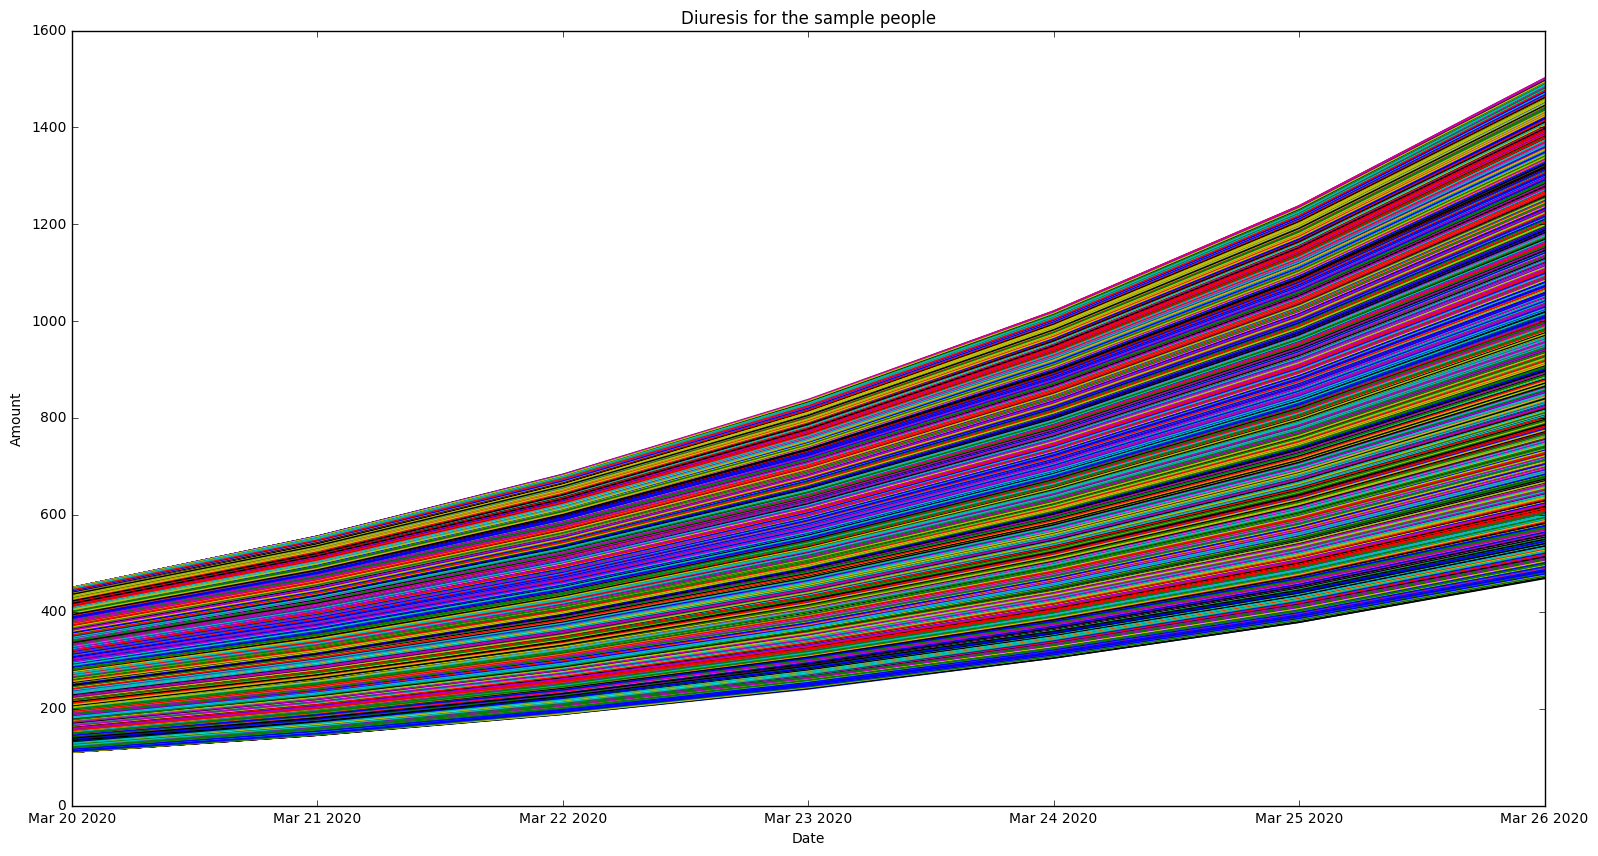

In [10]:
plt.figure(figsize=(19, 10))
plt.plot(data)
plt.title('Diuresis for the sample people')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.show()

# Diuresis value Forecast for 27th March

Since the peoblem is multivariated time series(MTS), the model used for the forecast is Vector Auto Regression (VAR).

In [11]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [12]:
model = VAR(endog=data)
model_fit = model.fit()
predicted_diuresis = model_fit.forecast(model_fit.y, steps=1)
print(predicted_diuresis)

C:\Users\shash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


[[1783.07208321  746.03636565 1692.69077528 ...  829.88908329
  1462.69873247  841.70438631]]


In [13]:
#predicted_diuresis.shape
model_fit.y[6]

array([1472.627904,  606.892864, 1395.793984, ...,  676.787008,
       1204.138048,  686.622784])

# Predicting Infection Probability on 27th March

In [14]:
data1.corr()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
people_ID,1.000000,0.017658,0.431198,0.453808,-0.002852,0.004807,0.027803,-0.003529,0.008761,-0.008545,0.014159,0.019324,0.010869,0.005129,0.009869,0.014231,0.001253,0.079361
Children,0.017658,1.000000,0.010288,0.022231,-0.051008,0.025788,-0.012099,0.024257,0.009991,0.004237,0.004667,-0.006082,-0.019529,0.009537,-0.005932,-0.018795,0.004873,0.226795
cases/1M,0.431198,0.010288,1.000000,0.987224,0.003632,-0.013573,0.030545,0.007451,0.006043,0.001949,0.014391,0.005189,-0.001050,-0.004485,0.013469,0.008901,0.000730,0.172871
Deaths/1M,0.453808,0.022231,0.987224,1.000000,0.003991,-0.010302,0.029605,0.009392,0.010402,0.000231,0.011776,0.007755,-0.001806,-0.005483,0.012602,0.008088,0.001679,0.174994
Age,-0.002852,-0.051008,0.003632,0.003991,1.000000,-0.002618,-0.006002,0.011583,0.013864,-0.007124,0.003763,-0.004047,0.002902,0.012601,-0.014370,-0.002901,0.015911,-0.331258
Coma score,0.004807,0.025788,-0.013573,-0.010302,-0.002618,1.000000,0.003086,-0.014236,0.006829,0.000628,-0.007071,0.007206,-0.005257,0.016351,-0.009284,0.004323,0.001476,0.038400
Diuresis,0.027803,-0.012099,0.030545,0.029605,-0.006002,0.003086,1.000000,0.009593,0.003935,-0.009508,-0.007295,0.011186,0.014366,-0.010999,0.023644,-0.006942,-0.016646,0.006887
Platelets,-0.003529,0.024257,0.007451,0.009392,0.011583,-0.014236,0.009593,1.000000,-0.008051,0.014238,-0.007283,-0.020991,-0.000346,0.010175,0.001908,-0.010824,0.013604,0.066727
HBB,0.008761,0.009991,0.006043,0.010402,0.013864,0.006829,0.003935,-0.008051,1.000000,-0.006569,-0.000063,0.004308,0.005610,-0.005476,-0.001508,-0.010870,-0.011895,0.019361
d-dimer,-0.008545,0.004237,0.001949,0.000231,-0.007124,0.000628,-0.009508,0.014238,-0.006569,1.000000,-0.007661,-0.002181,0.001157,-0.002948,0.016980,0.001513,-0.013268,0.021304


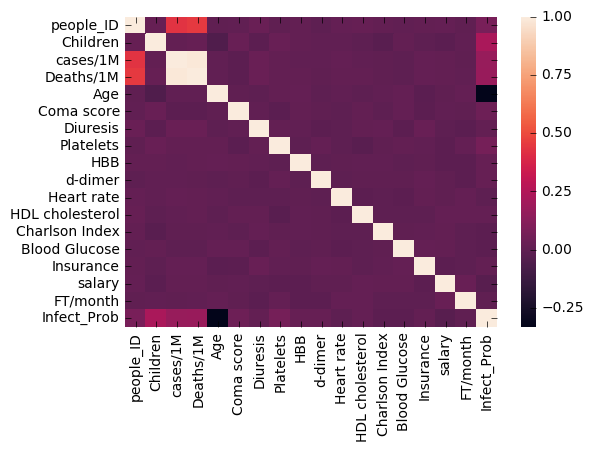

In [15]:
import seaborn as sns
# Plot the correlation usinf heatmap
corr = data1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [16]:
data1.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Married', 'Children',
       'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M', 'comorbidity',
       'Age', 'Coma score', 'Pulmonary score', 'cardiological pressure',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [17]:
data1.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Married                    object
Children                  float64
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [18]:
#Get a count of missing values in the dataset
data1.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

Filling Missing Values

In [19]:
data1['Children'].median()

1.0

In [20]:
data1 ['Children'].fillna('1.0', inplace=True)

In [21]:
#Examine Ocupation Attribute
data1['Occupation'].value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64

In [22]:
data1 ['Occupation'].fillna('Legal', inplace=True)

In [23]:
data1['Mode_transport'].mode()

0    Public
dtype: object

In [24]:
data1 ['Mode_transport'].fillna('Public', inplace=True)

In [25]:
data1['comorbidity'].mode()

0    Hypertension
dtype: object

In [26]:
data1 ['comorbidity'].fillna('Hypertension', inplace=True)

In [27]:
data1['cardiological pressure'].mode()

0    Normal
dtype: object

In [28]:
data1 ['cardiological pressure'].fillna('Normal', inplace=True)

In [29]:
data1['Diuresis'].mean()

278.80626125225047

In [30]:
data1 ['Diuresis'].fillna('278.80626125225047', inplace=True)

In [31]:
data1['Platelets'].mean()

87.79581205311543

In [32]:
data1 ['Platelets'].fillna('87.79581205311543', inplace=True)

In [33]:
data1['HBB'].mean()

116.17096653580109

In [34]:
data1 ['HBB'].fillna('116.17096653580109', inplace=True)

In [35]:
data1['d-dimer'].mean()

275.29229166666664

In [36]:
data1 ['d-dimer'].fillna('275.29229166666664', inplace=True)

In [37]:
data1['Heart rate'].median()

75.0

In [38]:
data1 ['Heart rate'].fillna('75.0', inplace=True)

In [39]:
data1['HDL cholesterol'].median()

53.0

In [40]:
data1 ['HDL cholesterol'].fillna('53.0', inplace=True)

In [41]:
data1['Insurance'].median()

2600000.0

In [42]:
data1 ['Insurance'].fillna('2600000.0', inplace=True)

In [43]:
data1['FT/month'].mean()

1.0046041437293565

In [44]:
data1 ['FT/month'].fillna('1.00460', inplace=True)

In [45]:
data1.isnull().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
Infect_Prob               0
dtype: int64

In [46]:
#Get a count of missing values in the dataset
data2.isnull().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
dtype: int64

In [47]:
data1.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Married                    object
Children                   object
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                   object
Platelets                  object
HBB                        object
d-dimer                    object
Heart rate                 object
HDL cholesterol            object
Charlson Index              int64
Blood Glucose               int64
Insurance                  object
salary                      int64
FT/month                   object
Infect_Prob               float64
dtype: object

In [48]:
data1['Region'].value_counts()

Chennai         2581
Bengaluru       2573
Chandigarh      2563
Bhubaneshwar    2537
Delhi            460
Name: Region, dtype: int64

In [49]:
data1['Region'].replace(['Chennai','Bengaluru','Chandigarh','Bhubaneshwar','Delhi'],[0,1,2,3,4],inplace=True)

In [50]:
data1['Gender'].value_counts()

Female    5423
Male      5291
Name: Gender, dtype: int64

In [51]:
data1['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [52]:
data1['Designation'].value_counts()

Mrs    5423
Mr     5291
Name: Designation, dtype: int64

In [53]:
data1['Designation'].replace(['Mrs','Mr'],[0,1],inplace=True)

In [54]:
data1['Married'].value_counts()

YES    8481
NO     2233
Name: Married, dtype: int64

In [55]:
data1['Married'].replace(['YES','NO'],[1,0],inplace=True)

In [56]:
data1['Children'].value_counts()

2.0    3829
1.0    3398
0.0    3176
1.0     311
Name: Children, dtype: int64

In [57]:
data1['Children'].replace(['2.0','1.0','0.0'],[2,1,0],inplace=True)

In [58]:
data1['Occupation'].value_counts()

Legal            1921
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64

In [59]:
data1['Occupation'].replace(['Legal','Sales','Manufacturing','Researcher','Farmer','Cleaner','Clerk','Driver','Business'],[0,1,2,3,4,5,6,7,8],inplace=True)

In [60]:
data1['Mode_transport'].value_counts()

Public    3591
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

In [61]:
data1['Mode_transport'].replace(['Public','Walk','Car'],[0,1,2],inplace=True)

In [62]:
data1['comorbidity'].value_counts()

Hypertension              2868
None                      2637
Diabetes                  2614
Coronary Heart Disease    2595
Name: comorbidity, dtype: int64

In [63]:
data1['comorbidity'].replace(['None','Hypertension','Diabetes','Coronary Heart Disease'],[0,1,2,3],inplace=True)

In [64]:
data1['Pulmonary score'].value_counts()

<400    2702
<200    2677
<300    2671
<100    2664
Name: Pulmonary score, dtype: int64

In [65]:
data1['Pulmonary score'].replace(['<100','<200','<300','<400'],[1,2,3,4],inplace=True)

In [66]:
data1['cardiological pressure'].value_counts()

Normal      2778
Stage-01    2657
Elevated    2641
Stage-02    2638
Name: cardiological pressure, dtype: int64

In [67]:
data1['cardiological pressure'].replace(['Normal','Stage-01','Elevated','Stage-02'],[0,1,2,3],inplace=True)

In [68]:
data1['FT/month'].value_counts()

1.0        3351
2.0        3343
0.0        3297
1.00460     723
Name: FT/month, dtype: int64

In [69]:
data2['Region'].replace(['Pune','Thiruvananthapuram','Kolkata','Mumbai','Hyderabad','Delhi'],[0,1,2,3,4,4],inplace=True)

In [70]:
data2['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [71]:
data2['Designation'].replace(['Mrs','Mr'],[0,1],inplace=True)

In [72]:
data2['Married'].replace(['YES','NO'],[1,0],inplace=True)

In [73]:
data2['Occupation'].replace(['Legal','Sales','Manufacturing','Researcher','Farmer','Cleaner','Clerk','Driver','Business'],[0,1,2,3,4,5,6,7,8],inplace=True)

In [74]:
data2['Mode_transport'].replace(['Public','Walk','Car'],[0,1,2],inplace=True)

In [75]:
data2['comorbidity'].replace(['None','Hypertension','Diabetes','Coronary Heart Disease'],[0,1,2,3],inplace=True)

In [76]:
data2['Pulmonary score'].replace(['<100','<200','<300','<400'],[1,2,3,4],inplace=True)

In [77]:
data2['cardiological pressure'].replace(['Normal','Stage-01','Elevated','Stage-02'],[0,1,2,3],inplace=True)

In [78]:
data1.head()

,people_ID,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,3,0,0,1,1,4,0,2,0,...,93,233,82,58,27,7,3.6e+06,1300000,2,49.135010
1,2,3,0,0,1,2,4,1,2,0,...,56,328,89,68,5,6,1.6e+06,400000,1,51.147880
2,3,3,0,0,0,1,5,0,2,0,...,137,213,77,43,40,6,3.4e+06,900000,1,73.224000
3,4,3,0,0,1,1,7,2,2,0,...,167,275,64,60,27,7,700000,2300000,1,48.779225
4,5,3,0,0,0,2,2,2,2,0,...,153,331,71,64,32,7,3.2e+06,1100000,1,87.868800


In [79]:
data2 = data1

# Multi-Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [81]:
X_train=data1.iloc[:,0:26].values
Y_train=data1.iloc[:,26].values
X_test=data2.iloc[:,0:26].values

In [82]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [83]:
mlr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
y_pred=mlr.predict(X_test)

In [85]:
predict = mlr.predict(X_test)
predict

array([48.83721603, 52.48945703, 61.09502959, ..., 50.17547881,
       54.17046576, 66.30544901])

In [86]:
data1.shape

(10714, 27)

In [87]:
data2.shape

(10714, 27)

In [88]:
final_output = pd.DataFrame(data1['people_ID'])
final_output['Infect_Prob'] = predict
final_output.head()

,people_ID,Infect_Prob
0,1,48.837216
1,2,52.489457
2,3,61.095030
3,4,48.476835
4,5,61.576999


In [89]:
final_output.to_excel("Solution2.xlsx")